<a href="https://colab.research.google.com/github/SnehaRathi123/Major-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/SMARTKNOWER-ML/Major_project/IMDB_Dataset.csv")

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

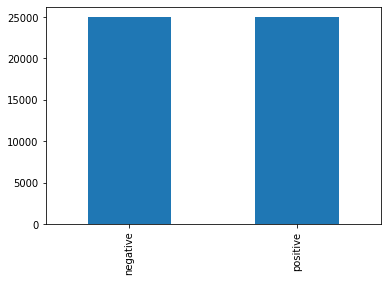

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
stopword_list =nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
len(stopword_list)

177

In [ ]:
from bs4 import BeautifulSoup
#remove html tags
def remove_htmltags(text):
  soup =BeautifulSoup(text,'html.parser')
  new_text=soup.get_text()
  return new_text

In [ ]:
#Expand Contractions
!pip install contractions
import contractions
def exp_con(text):
  expand =contractions.fix(text)
  return expand

     |████████████████████████████████| 286kB 13.8MB/s 
     |████████████████████████████████| 327kB 18.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85398 sha256=4714535b26615b2322b30120135c3c9ba133835c73be584e3736bb0496c39533
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
#REMOVE SPECIAL CHRACTERS
import re
def remove_sp(text):
  pattern = r'[^A-Za-z0-9\s]'
  text = re.sub(pattern,'',text)
  return text

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()

In [ ]:
#remove stopwords
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens =[token for token in tokens if token not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

In [ ]:
df.review = df.review.apply(lambda x:x.lower())
df.review = df.review.apply(remove_htmltags)
df.review = df.review.apply(exp_con)
df.review = df.review.apply(remove_sp)
df.review = df.review.apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
def lem(text):
  lem = WordNetLemmatizer()
  lem.lemmatize(text)
  return text

In [ ]:
df.review = df.review.apply(lem)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:

x = df['review'].values
y = df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(37500,)
(12500,)


In [ ]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['negative', 'positive'], dtype=object), array([18709, 18791]))

In [ ]:
np.unique(y_test,return_counts=True)

(array(['negative', 'positive'], dtype=object), array([6291, 6209]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
model = SVC()
model.fit(x_train_v,y_train)
y_pred = model.predict(x_test_v)
y_pred

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
y_test

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.89376

In [ ]:
confusion_matrix(y_pred,y_test)

array([[5562,  599],
       [ 729, 5610]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      6161
    positive       0.90      0.88      0.89      6339

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



In [ ]:
# Display Pipeline

from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred = text_model.predict(x_test)
y_pred

array(['positive', 'negative', 'positive', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [ ]:
accuracy_score(y_pred,y_test)

0.89376

In [ ]:
text = df['review'][10]
text_model.predict([text])

array(['negative'], dtype=object)

In [ ]:
text

'phil alien one quirky films humour based around oddness everything rather actual punchlinesat first odd pretty funny movie progressed not find jokes oddness funny anymoreits low budget film never problem pretty interesting characters eventually lost interesti imagine film would appeal stoner currently partakingfor something similar better try brother another planet'

In [ ]:
import joblib
joblib.dump(text_model,'sentiment-analysis')

['sentiment-analysis']

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 14.8MB/s 
     |████████████████████████████████| 112kB 75.7MB/s 
     |████████████████████████████████| 4.2MB 52.2MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 174kB 74.6MB/s 
     |████████████████████████████████| 122kB 63.8MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15985 sha256=d9bb66be0c111e8b6147b99aaf7773ba72e147e869d57f9028590bc22eab020e
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('sentiment-analysis')
st.title('sentiment-analysis')
ip = st.text_input("Enter the message")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0]) 

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://186746660f1a.ngrok.io'